First of all foy applying the answer and solution for any Problem or Question
# Importing libraries 

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read data by using pandas to make it in dataframe

In [141]:
dfcar=pd.read_csv('usedcarKSA.csv')

Display dataframe

In [142]:
dfcar

,car_brand,car_model,car_driven,car_transmission,car_model_year,car_price
0,Hyundai,Tucson,83491.0,Automatic,2018,64000.0
1,Chevrolet,Trailblazer,222000.0,Automatic,2009,20000.0
2,Great,Wall,0.0,Automatic,2022,135000.0
3,Ford,Fusion,178000.0,Automatic,2012,23000.0
4,Mitsubishi,Attrage,10500.0,Automatic,2020,32000.0
...,...,...,...,...,...,...
2282,BMW,7,99000.0,Automatic,2015,103000.0
2283,Ford,Expedition,33000.0,Automatic,2018,185000.0
2284,Chevrolet,Tahoe,48000.0,Automatic,2018,135000.0
2285,Chevrolet,Tahoe,50000.0,Automatic,2018,135000.0


In [143]:
dfcar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_brand         2287 non-null   object 
 1   car_model         2287 non-null   object 
 2   car_driven        2287 non-null   float64
 3   car_transmission  2287 non-null   object 
 4   car_model_year    2287 non-null   int64  
 5   car_price         2287 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 107.3+ KB


Let's now plot the histogram of the car brand.

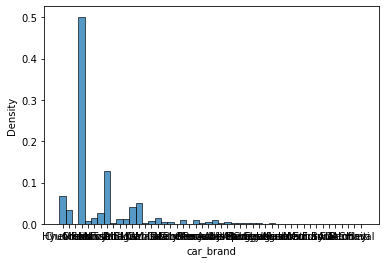

In [144]:
sns.histplot(dfcar['car_brand'], kde=False,bins=8, stat='density');

Visulaize the outlier for car_driven and car_price (numrical values only)

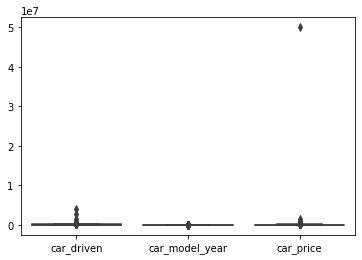

In [145]:
sns.boxplot(data=dfcar);

Try to view outlier with different plot

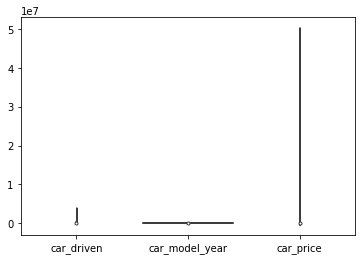

In [146]:
sns.violinplot(data=dfcar);

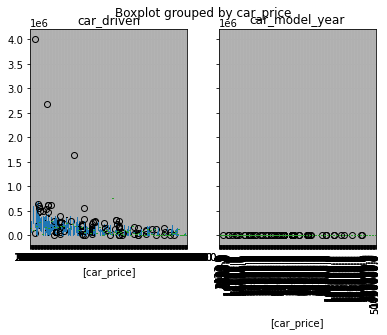

In [258]:
dfcar.boxplot(by ='car_price')
plt.xticks(rotation=90)
plt.show()

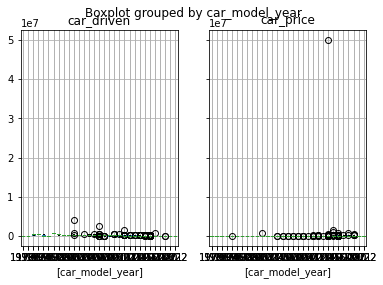

In [148]:
dfcar.boxplot(by = 'car_model_year');

**Check null value for cleaning**

In [149]:
dfcar.isna().sum()

car_brand           0
car_model           0
car_driven          0
car_transmission    0
car_model_year      0
car_price           0
dtype: int64

**Handling problem for nan or null value does not appear**

In [150]:
missing_value=["N/a","na",np.nan]
dfcar=pd.read_csv('usedcarKSA.csv', na_values=missing_value)

Checking null values after handling problem for nan or null value doesn't appear

In [151]:
dfcar.isnull().sum()

car_brand           0
car_model           0
car_driven          0
car_transmission    0
car_model_year      0
car_price           0
dtype: int64

**Keeping nonzero variables and removing zero if any**

In [152]:
dfcar1=dfcar[~(dfcar == 0).any(axis=1)]

Dispaly new dataframe with nonzero

In [153]:
dfcar1

,car_brand,car_model,car_driven,car_transmission,car_model_year,car_price
0,Hyundai,Tucson,83491.0,Automatic,2018,64000.0
1,Chevrolet,Trailblazer,222000.0,Automatic,2009,20000.0
3,Ford,Fusion,178000.0,Automatic,2012,23000.0
4,Mitsubishi,Attrage,10500.0,Automatic,2020,32000.0
5,Honda,HR-V,1000.0,Automatic,2021,80000.0
...,...,...,...,...,...,...
2282,BMW,7,99000.0,Automatic,2015,103000.0
2283,Ford,Expedition,33000.0,Automatic,2018,185000.0
2284,Chevrolet,Tahoe,48000.0,Automatic,2018,135000.0
2285,Chevrolet,Tahoe,50000.0,Automatic,2018,135000.0


**Reseting indecies after removing any new car with driven= 0**

In [154]:
dfcar1.reset_index(drop=True , inplace=True) 

Display dataframe after reset indecies

In [155]:
dfcar1

,car_brand,car_model,car_driven,car_transmission,car_model_year,car_price
0,Hyundai,Tucson,83491.0,Automatic,2018,64000.0
1,Chevrolet,Trailblazer,222000.0,Automatic,2009,20000.0
2,Ford,Fusion,178000.0,Automatic,2012,23000.0
3,Mitsubishi,Attrage,10500.0,Automatic,2020,32000.0
4,Honda,HR-V,1000.0,Automatic,2021,80000.0
...,...,...,...,...,...,...
2274,BMW,7,99000.0,Automatic,2015,103000.0
2275,Ford,Expedition,33000.0,Automatic,2018,185000.0
2276,Chevrolet,Tahoe,48000.0,Automatic,2018,135000.0
2277,Chevrolet,Tahoe,50000.0,Automatic,2018,135000.0


Viewing the rows and columns number after removing

In [156]:
dfcar1.shape 

(2279, 6)

**Make the car brand apper case for inconsistencies and more data cleaning**

In [157]:
dfcar1.car_brand=dfcar1.car_brand.str.upper() 

/Users/bushrausif/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Display dataframe with upper case letter on car_brand

In [158]:
dfcar1

,car_brand,car_model,car_driven,car_transmission,car_model_year,car_price
0,HYUNDAI,Tucson,83491.0,Automatic,2018,64000.0
1,CHEVROLET,Trailblazer,222000.0,Automatic,2009,20000.0
2,FORD,Fusion,178000.0,Automatic,2012,23000.0
3,MITSUBISHI,Attrage,10500.0,Automatic,2020,32000.0
4,HONDA,HR-V,1000.0,Automatic,2021,80000.0
...,...,...,...,...,...,...
2274,BMW,7,99000.0,Automatic,2015,103000.0
2275,FORD,Expedition,33000.0,Automatic,2018,185000.0
2276,CHEVROLET,Tahoe,48000.0,Automatic,2018,135000.0
2277,CHEVROLET,Tahoe,50000.0,Automatic,2018,135000.0


Removing WhiteSpaces from car_brand column by using strip()

In [159]:
dfcar1.car_brand=dfcar1.car_brand.str.strip()
dfcar1

/Users/bushrausif/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,car_brand,car_model,car_driven,car_transmission,car_model_year,car_price
0,HYUNDAI,Tucson,83491.0,Automatic,2018,64000.0
1,CHEVROLET,Trailblazer,222000.0,Automatic,2009,20000.0
2,FORD,Fusion,178000.0,Automatic,2012,23000.0
3,MITSUBISHI,Attrage,10500.0,Automatic,2020,32000.0
4,HONDA,HR-V,1000.0,Automatic,2021,80000.0
...,...,...,...,...,...,...
2274,BMW,7,99000.0,Automatic,2015,103000.0
2275,FORD,Expedition,33000.0,Automatic,2018,185000.0
2276,CHEVROLET,Tahoe,48000.0,Automatic,2018,135000.0
2277,CHEVROLET,Tahoe,50000.0,Automatic,2018,135000.0


**Grouping the dataframe by brand and price to know the heghiest brand prices in Saudi Arabia**

In [160]:
df_price = dfcar1.groupby('car_brand')[['car_price']].sum()

Display car brand and sum the prices

In [161]:
df_price

,car_price
car_brand,
ABARTH,281500.0
ASTON,200000.0
AUDI,51384000.0
BAIC,50000.0
BENTLEY,700000.0
BMW,2019000.0
CADILLAC,435000.0
CHANGAN,110000.0
CHERY,36000.0


**Q: What is the maximum price anyone has paid?**

In [162]:
df_price['car_price'].max()

84108597.0

In [163]:
df_price[df_price['car_price'] == df_price['car_price'].max()]

,car_price
car_brand,
FORD,84108597.0


**Q: Client want the maximum price per brands to know the most use in KSA**

In [164]:
df_price.groupby('car_brand')[['car_price']].head(10)

,car_price
car_brand,
ABARTH,281500.0
ASTON,200000.0
AUDI,51384000.0
BAIC,50000.0
BENTLEY,700000.0
BMW,2019000.0
CADILLAC,435000.0
CHANGAN,110000.0
CHERY,36000.0


**Q: What is the total amount paid by each brand and model?**

Assuming that we want to see the most highest sales brands sort it by car price

In [165]:
df_price=df_price.sort_values(by='car_price',ascending=False)

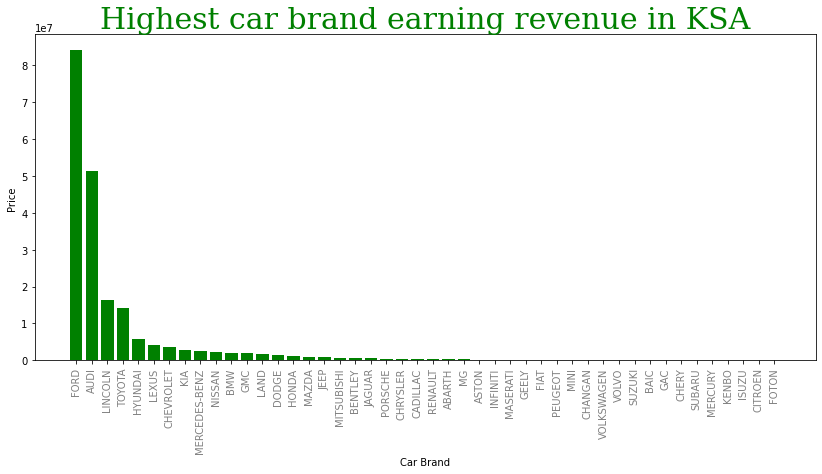

In [166]:
plybest=plt.figure(figsize=[14,6])
plt.bar(df_price.index,df_price.car_price,color='g')
plt.xticks(rotation=90,color='gray');
plt.title('Highest car brand earning revenue in KSA',family='serif',fontsize = 30,loc='center',color='g')
plt.xlabel('Car Brand')
plt.ylabel('Price')
plt.savefig("mostpricebrand.png");

In [167]:
pricemean = dfcar1.groupby('car_brand')[['car_price']].mean()

In [168]:
pricemean.sort_values(by='car_price',ascending=False)

,car_price
car_brand,
AUDI,3.952615e+06
BENTLEY,7.000000e+05
ASTON,2.000000e+05
INFINITI,1.900000e+05
LEXUS,1.878080e+05
LINCOLN,1.441107e+05
LAND,1.346923e+05
JAGUAR,1.274000e+05
MERCEDES-BENZ,1.123913e+05


Visualize the mean of prices 

Text(0, 0.5, 'Price')

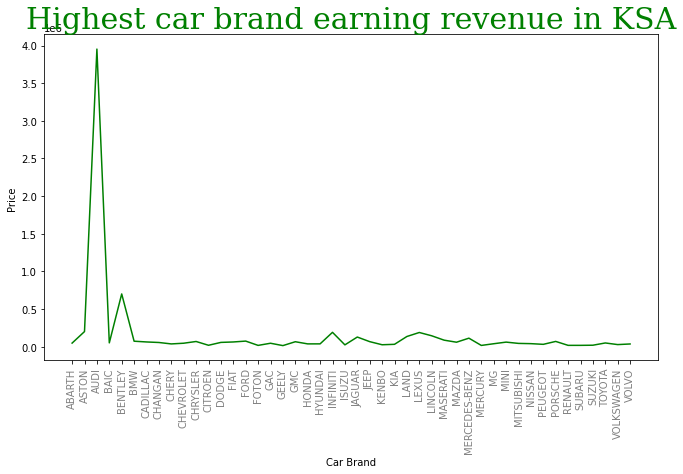

In [169]:
plybest=plt.figure(figsize=[11,6])
plt.plot(pricemean.index,pricemean.car_price,color='g')
plt.xticks(rotation=90,color='gray');
plt.title('Highest car brand earning revenue in KSA',family='serif',fontsize = 30,loc='center',color='g')
plt.xlabel('Car Brand')
plt.ylabel('Price')

**Q: What is the most 6 used car in KSA?**

Now, Assuming client want to know the most used car , i will COUNT the most common used car with new columns 

In [170]:
df_mcount=dfcar1.groupby(["car_brand"]).agg(
    mostused=pd.NamedAgg(column="car_brand", aggfunc="count")
)
df_mcount

,mostused
car_brand,
ABARTH,6
ASTON,1
AUDI,13
BAIC,1
BENTLEY,1
BMW,28
CADILLAC,7
CHANGAN,2
CHERY,1


**Filter the dataframe by performing mask of most used car more than 25**

In [171]:
mask=df_mcount.mostused >=60
df_mcount[mask]

,mostused
car_brand,
CHEVROLET,79
FORD,1144
HYUNDAI,156
KIA,91
LINCOLN,114
TOYOTA,294


Sort the most use in ascending false to start the highest car used end with lowest car used

In [172]:
df_mcount[mask].sort_values(by='mostused',ascending=False)

,mostused
car_brand,
FORD,1144
TOYOTA,294
HYUNDAI,156
LINCOLN,114
KIA,91
CHEVROLET,79


In [173]:
dfm6=df_mcount.sort_values(by='mostused',ascending=False)
dft=dfm6.head(6)
dft

,mostused
car_brand,
FORD,1144
TOYOTA,294
HYUNDAI,156
LINCOLN,114
KIA,91
CHEVROLET,79


# This Figure show the most used vehicle car in KSA

Visualize the most used vehicle car by mostued

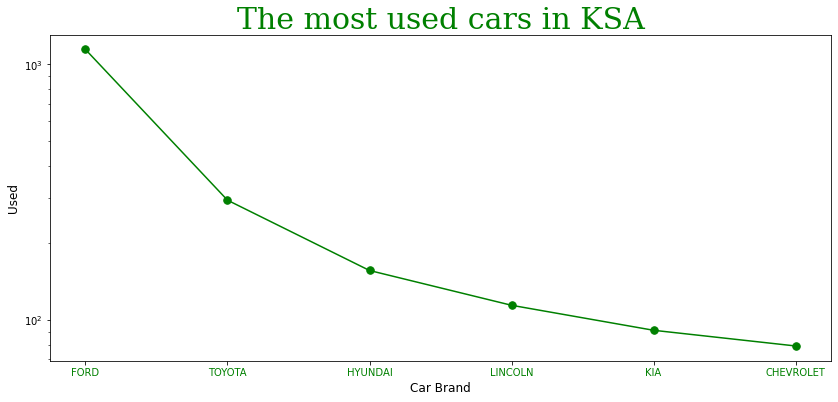

In [174]:
top=plt.figure(figsize=[14,6])
plt.semilogy(dft.index,dft.mostused,c='g')
plt.semilogy(dft.index,dft.mostused,'.',ms=15,c='g')
plt.xticks(color='g')
plt.title('The most used cars in KSA',family='serif',fontsize = 30,loc='center',color='g')
plt.xlabel('Car Brand',fontsize = 12)
plt.ylabel('Used',fontsize = 12)
plt.savefig("mostksauc.png");

Text(0, 0.5, 'Used')

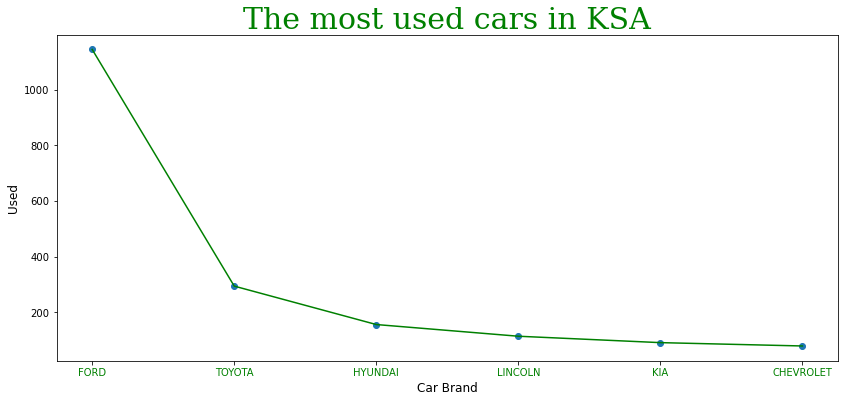

In [175]:
top=plt.figure(figsize=[14,6])
plt.plot(dft.index,dft.mostused,c='g')
plt.scatter(dft.index,dft.mostused);
#plt.semilogy(dft.index,dft.mostused,c='g')
#plt.semilogy(dft.index,dft.mostused,'.',ms=15,c='g')
plt.xticks(color='g')
plt.title('The most used cars in KSA',family='serif',fontsize = 30,loc='center',color='g')
plt.xlabel('Car Brand',fontsize = 12)
plt.ylabel('Used',fontsize = 12)

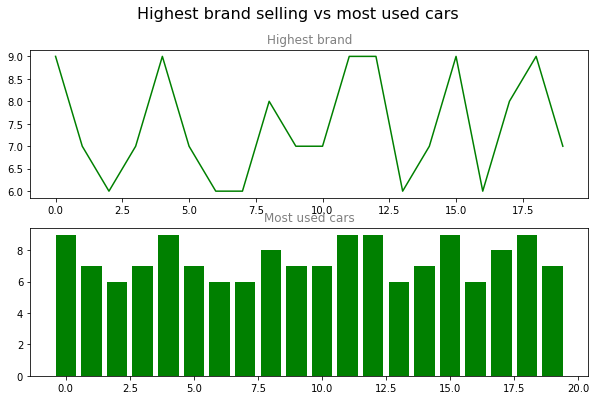

In [176]:
new_x = np.arange(20)
new_y = np.random.randint(5,10,20)

plt.figure(figsize=[10,6])

plt.suptitle('Highest brand selling vs most used cars ',fontsize = 16)

plt.subplot(2,1,1) # (number of rows, number of columns, number of plot)
plt.plot(new_x,new_y,color='g')
plt.title('Highest brand',color='gray')

plt.subplot(2,1,2)
plt.bar(new_x,new_y,color='g')
plt.title('Most used cars',color='gray');

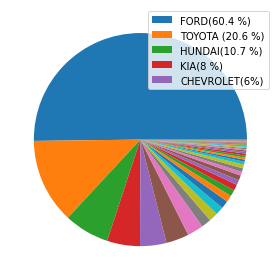

In [177]:
plt.pie("mostused", data=dfm6);
labels = ['FORD(60.4 %)', 'TOYOTA (20.6 %)', 
'HUNDAI(10.7 %)', 'KIA(8 %)','CHEVROLET(6%)']
plt.legend(labels , loc="best");
plt.tight_layout();
plt.savefig("mostcartorent.png");

**Now we are here to Assuming that client want to buy a used vehicle car with low car driven  , new and its price low**

 Perform aggregation and assign it to new dataframe called newdf

In [178]:
newdf=dfcar1.groupby(['car_brand','car_model'])[['car_driven','car_model_year','car_price']].agg({
    
   'car_driven':'min',
   'car_model_year':'max',
   'car_price':'min' 
    
})

Display new dataframe

In [179]:
newdf.reset_index(inplace=True) 

In [180]:
newdf

,car_brand,car_model,car_driven,car_model_year,car_price
0,ABARTH,124,400.0,2020,5000.0
1,ABARTH,695,138.0,2014,21000.0
2,ASTON,Martin,35000.0,2013,200000.0
3,AUDI,A3,140000.0,2015,55000.0
4,AUDI,A4,12.0,2015,50000000.0
...,...,...,...,...,...
217,VOLKSWAGEN,Passat,233500.0,2012,34500.0
218,VOLKSWAGEN,Touareg,153000.0,2014,56000.0
219,VOLVO,C30,158000.0,2009,21000.0
220,VOLVO,S80,253000.0,2009,10000.0


**Removing any car with driven less than 100 by filltring dataframe**

In [183]:
maskofmostusedcar=(newdf.car_driven >70000) & (newdf.car_driven <100000) & (newdf.car_price <=100000) & (newdf.car_model_year>2014) & (newdf.car_model_year<=2020)
newdf[maskofmostusedcar]

,car_brand,car_model,car_driven,car_model_year,car_price
16,BMW,7,82000.0,2015,20000.0
17,BMW,X3,95000.0,2015,85000.0
33,CHEVROLET,Cruze,95000.0,2016,12000.0
44,CHEVROLET,Traverse,80000.0,2019,15000.0
52,DODGE,Durango,80000.0,2017,35000.0
84,HONDA,City,90000.0,2017,30000.0
94,HYUNDAI,Grand,74000.0,2016,75000.0
114,KIA,Carnival,80000.0,2016,16000.0
116,KIA,Mohave,97000.0,2016,45000.0
141,MAZDA,3,75000.0,2019,12500.0


In [184]:
m1=newdf[maskofmostusedcar].sort_values(by='car_model_year',ascending=False)
m1

,car_brand,car_model,car_driven,car_model_year,car_price
44,CHEVROLET,Traverse,80000.0,2019,15000.0
141,MAZDA,3,75000.0,2019,12500.0
52,DODGE,Durango,80000.0,2017,35000.0
84,HONDA,City,90000.0,2017,30000.0
161,MG,6,79000.0,2017,17000.0
33,CHEVROLET,Cruze,95000.0,2016,12000.0
94,HYUNDAI,Grand,74000.0,2016,75000.0
114,KIA,Carnival,80000.0,2016,16000.0
116,KIA,Mohave,97000.0,2016,45000.0
199,TOYOTA,Avalon,80000.0,2016,65000.0


In [188]:
m1.reset_index(inplace=True) 
m1

,level_0,index,car_brand,car_model,car_driven,car_model_year,car_price
0,0,44,CHEVROLET,Traverse,80000.0,2019,15000.0
1,1,141,MAZDA,3,75000.0,2019,12500.0
2,2,52,DODGE,Durango,80000.0,2017,35000.0
3,3,84,HONDA,City,90000.0,2017,30000.0
4,4,161,MG,6,79000.0,2017,17000.0
5,5,33,CHEVROLET,Cruze,95000.0,2016,12000.0
6,6,94,HYUNDAI,Grand,74000.0,2016,75000.0
7,7,114,KIA,Carnival,80000.0,2016,16000.0
8,8,116,KIA,Mohave,97000.0,2016,45000.0
9,9,199,TOYOTA,Avalon,80000.0,2016,65000.0


### Now , we are here to visualizing the mask based on the client request 

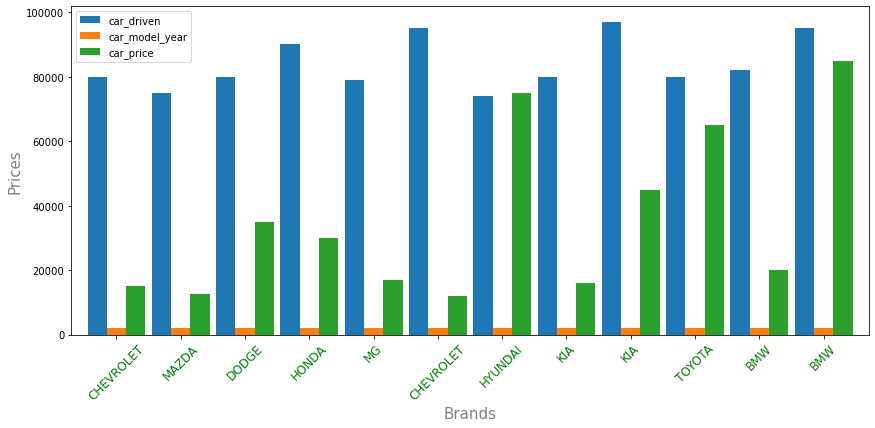

In [189]:
m1.sort_values(by=['car_model_year'])
m1.plot(x="car_brand",width = 0.9, y=["car_model","car_driven",
"car_model_year","car_price"], kind="bar",figsize=(12, 6))
plt.xticks(fontsize=12,rotation=45,color='g')       
plt.tight_layout()
plt.ylabel("Prices",fontsize=15,color='gray')
plt.xlabel("Brands",fontsize=15,color='gray')
plt.show()

### (Create a Box Plot)
Let's create a box plot for each of the numerical features in my dataset to understands the outliers

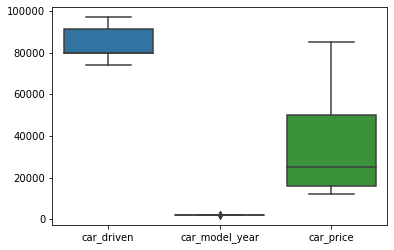

In [86]:
sns.boxplot(data=m1);

# 1. Correlation

__Preform correlations:__ between car driven and price to make bettter understand for the client 
__By:__
1. Creating new dataframe subset of numerical values.
2. Typically, calculate the and Correlation Matrices of a data set to observe all the paired correlation values for every pair of variables .

In [190]:
home_df_subset = newdf.loc[:, ['car_driven', 'car_model_year', 'car_price']]
home_df_subset

,car_driven,car_model_year,car_price
0,400.0,2020,5000.0
1,138.0,2014,21000.0
2,35000.0,2013,200000.0
3,140000.0,2015,55000.0
4,12.0,2015,50000000.0
...,...,...,...
217,233500.0,2012,34500.0
218,153000.0,2014,56000.0
219,158000.0,2009,21000.0
220,253000.0,2009,10000.0


In [191]:
home_df_subset = home_df_subset.dropna()
home_df_subset

,car_driven,car_model_year,car_price
0,400.0,2020,5000.0
1,138.0,2014,21000.0
2,35000.0,2013,200000.0
3,140000.0,2015,55000.0
4,12.0,2015,50000000.0
...,...,...,...
217,233500.0,2012,34500.0
218,153000.0,2014,56000.0
219,158000.0,2009,21000.0
220,253000.0,2009,10000.0


### 1.2 Correlation

In [192]:
home_df_subset_corr = pd.DataFrame(np.corrcoef(home_df_subset.T))
home_df_subset_corr.columns = ['car_driven', 'car_model_year', 'car_price']
home_df_subset_corr.index = ['car_driven', 'car_model_year', 'car_price']
home_df_subset_corr

,car_driven,car_model_year,car_price
car_driven,1.000000,-0.680648,-0.064514
car_model_year,-0.680648,1.000000,0.006263
car_price,-0.064514,0.006263,1.000000


Now evaluate the correlation between every pair of variables in the subsetted data set. For example:
- The correlation between car driven and car price is -0.064514
- The correlation between car price and car model year is 0.006263	

Below we are going to analyze graphically the relationship between __car_driven__ and __car_price__ which are highly correlated, as well as __car_model_year__ and __car_price__ which have a low correlation,

First will normalize the features (calculate their z-score) by subtracting their mean and dividing by their standard deviation.

In [193]:
driven_Norm = (home_df_subset['car_driven']-np.mean(home_df_subset['car_driven']))/np.std(home_df_subset['car_driven'])
price_Norm = (home_df_subset['car_price']-np.mean(home_df_subset['car_price']))/np.std(home_df_subset['car_price'])

carmodel_Norm = (home_df_subset['car_model_year']-np.mean(home_df_subset['car_model_year']))/np.std(home_df_subset['car_model_year'])
pricewithm_Norm = (home_df_subset['car_price']-np.mean(home_df_subset['car_price']))/np.std(home_df_subset['car_price'])

Text(0, 0.5, 'Normalized Price')

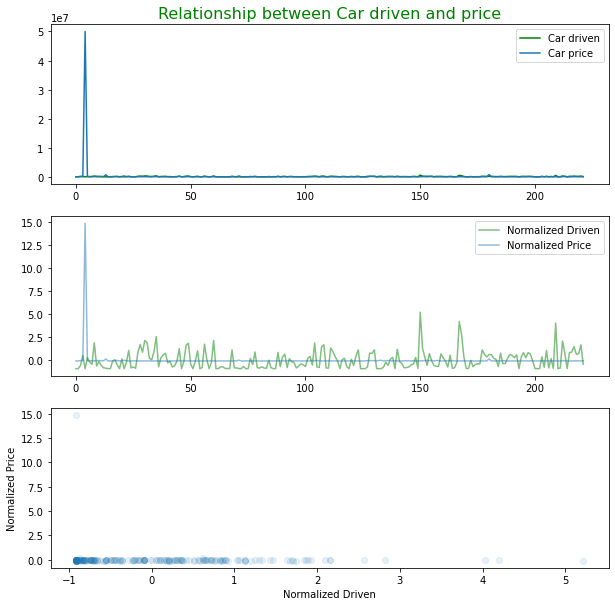

In [209]:
plt.figure(figsize=[10,10])
plt.subplot(3,1,1)
plt.title('Relationship between Car driven and price',fontsize = 16,color='g')
plt.plot(home_df_subset['car_driven'],color='g')
plt.plot(home_df_subset['car_price'])
plt.legend(['Car driven','Car price'])
plt.subplot(3,1,2)
plt.plot(driven_Norm,alpha = 0.5,color='g')
plt.plot(price_Norm,alpha = 0.5)
plt.legend(['Normalized Driven','Normalized Price'])
plt.subplot(3,1,3)
plt.scatter(driven_Norm,price_Norm,alpha = 0.1)
plt.xlabel('Normalized Driven')
plt.ylabel('Normalized Price')

As we can see, there is a relationship between 'car_driven' and 'car_price'.

Text(0, 0.5, 'Normalized Price')

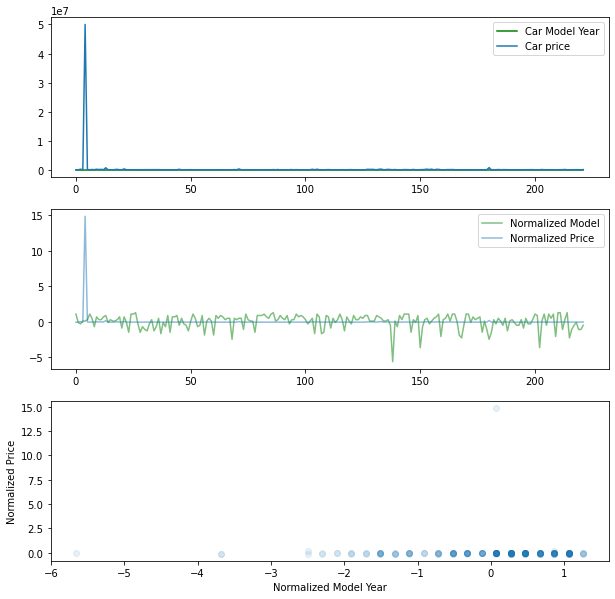

In [204]:
plt.figure(figsize=[10,10])
plt.subplot(3,1,1)
plt.plot(home_df_subset['car_model_year'],color='g')
plt.plot(home_df_subset['car_price'])
plt.legend(['Car Model Year','Car price'])
plt.subplot(3,1,2)
plt.plot(carmodel_Norm,alpha = 0.5,color='g')
plt.plot(price_Norm,alpha = 0.5)
plt.legend(['Normalized Model','Normalized Price'])
plt.subplot(3,1,3)
plt.scatter(carmodel_Norm,price_Norm,alpha = 0.1)
plt.xlabel('Normalized Model Year')
plt.ylabel('Normalized Price')

In this case, there is a relationship between 'car_model_year' and 'car_price'.

# (Correlation Heat Map): 

Text(0.5, 1.0, 'Heat Map')

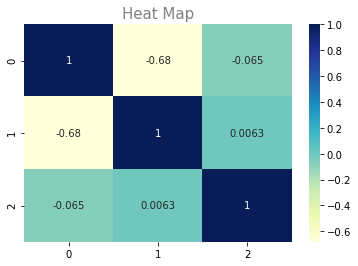

In [217]:
p=sns.heatmap(np.corrcoef(home_df_subset.T),annot=True,cmap="YlGnBu")
p.set_title("Heat Map",color='gray',size=15)

### __Merge___ newdf with the dataframe of count most used car

In [220]:
newdf=pd.merge(newdf, df_mcount, on='car_brand')
newdf

,car_brand,car_model,car_driven,car_model_year,car_price,mostused
0,ABARTH,124,400.0,2020,5000.0,6
1,ABARTH,695,138.0,2014,21000.0,6
2,ASTON,Martin,35000.0,2013,200000.0,1
3,AUDI,A3,140000.0,2015,55000.0,13
4,AUDI,A4,12.0,2015,50000000.0,13
...,...,...,...,...,...,...
217,VOLKSWAGEN,Passat,233500.0,2012,34500.0,4
218,VOLKSWAGEN,Touareg,153000.0,2014,56000.0,4
219,VOLVO,C30,158000.0,2009,21000.0,3
220,VOLVO,S80,253000.0,2009,10000.0,3


In [221]:
newdf=newdf.sort_values(by='mostused',ascending=False)
newdf

,car_brand,car_model,car_driven,car_model_year,car_price,mostused
64,FORD,Figo,20190.0,2018,13500.0,1144
72,FORD,Taurus,85.0,2017,33999.0,1144
70,FORD,Ranger,8184.0,2016,22999.0,1144
69,FORD,Mustang,7796.0,2017,75000.0,1144
68,FORD,Mondeo,200000.0,2002,6000.0,1144
...,...,...,...,...,...,...
26,CHERY,Arrizo,4600.0,2021,36000.0,1
13,BENTLEY,Bentayga,5000.0,2019,700000.0,1
12,BAIC,A115,10000.0,2018,50000.0,1
2,ASTON,Martin,35000.0,2013,200000.0,1


In [225]:
maskofmostusedcar1=(newdf.mostused >100)
newdf[maskofmostusedcar1]

,car_brand,car_model,car_driven,car_model_year,car_price,mostused
64,FORD,Figo,20190.0,2018,13500.0,1144
72,FORD,Taurus,85.0,2017,33999.0,1144
70,FORD,Ranger,8184.0,2016,22999.0,1144
69,FORD,Mustang,7796.0,2017,75000.0,1144
68,FORD,Mondeo,200000.0,2002,6000.0,1144
67,FORD,Fusion,157.0,2017,23000.0,1144
66,FORD,Focus,1739.0,2017,10500.0,1144
65,FORD,Flex,2700.0,2016,18500.0,1144
63,FORD,F-150,18000.0,2019,35000.0,1144
62,FORD,Explorer,853.0,2017,11000.0,1144


In [224]:
newbrand2=newdf.groupby('car_driven')[['car_price','car_brand','car_model']].count().sort_values(by="car_driven", ascending=False)
newprof.reset_index()

,car_driven,car_price,car_brand,car_model
0,600000.0,1,1,1
1,500000.0,1,1,1
2,484000.0,1,1,1
3,365000.0,1,1,1
4,341039.0,1,1,1
5,300000.0,2,2,2
6,294000.0,1,1,1
7,278000.0,1,1,1
8,275000.0,1,1,1
9,272000.0,1,1,1


In [98]:
newprof['mostused'] = dfm6['mostused']
msss=newprof

<ipython-input-98-42dcdde705da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newprof['mostused'] = dfm6['mostused']


In [99]:
mus=msss.reset_index()

In [102]:
#mus.sort_values(by=['mostused'])
#sns.countplot(x="car_brand" ,width = 0.9, y=["mostused","car_price"], kind="bar",figsize=(12, 6))
#plt.xticks(fontsize=12,rotation=45)       
#plt.tight_layout()
#plt.show()

<AxesSubplot:xlabel='mostused', ylabel='count'>

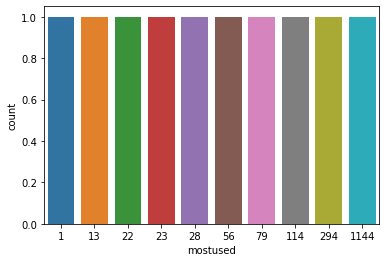

In [101]:
sns.countplot(x=newprof.mostused)

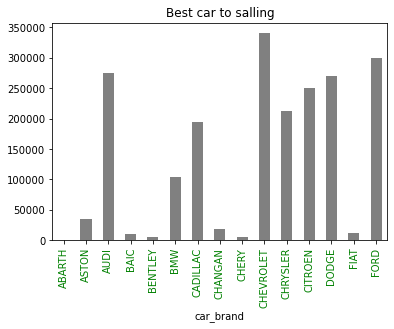

In [808]:
newdf.groupby('car_brand').car_driven.max().head(15).plot(kind='bar',color='gray')
plt.savefig("bestcartorent.png");
plt.title("Best car to salling");
plt.xticks(rotation=90,color='g');

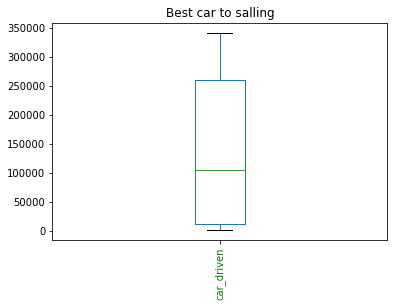

In [806]:
newdf.groupby('car_brand').car_driven.max().head(15).plot(kind='box')
plt.savefig("bestcartorent.png");
plt.title("Best car to salling");
plt.xticks(rotation=90,color='g');

<AxesSubplot:xlabel='car_price', ylabel='car_driven'>

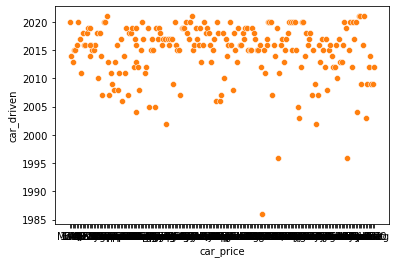

In [582]:
#plt.subplot(1,2,1)
#plt.plot(kind='scatter',data=newdf[newdf.car_driven,newdf.car_price])
ms=sns.scatterplot(x="car_price", y="car_driven", data=newdf)
ms
ml=sns.scatterplot(x="car_model", y="car_model_year", data=newdf)
ml
#plt.subplot(1,2,2)
#plt.plot(kind='scatter',data=newdf[newdf.car_model,newdf.car_model_year])

In [446]:
nwedf.mostused.value_counts()

79      18
1144    17
294     17
156     14
13      14
91      13
17      13
23      13
7       11
56      10
1       10
4        9
21       8
28       8
22       7
2        7
34       7
27       6
114      6
31       5
3        3
10       2
6        2
5        2
Name: mostused, dtype: int64

Let's create a new column in the dataframe to tell us whether or not each brand its sales over 50

In [226]:
newdf['up_to_50_sales'] = newdf.mostused >= 200

In [227]:
newdf.head()

,car_brand,car_model,car_driven,car_model_year,car_price,mostused,up_to_50_sales
64,FORD,Figo,20190.0,2018,13500.0,1144,True
72,FORD,Taurus,85.0,2017,33999.0,1144,True
70,FORD,Ranger,8184.0,2016,22999.0,1144,True
69,FORD,Mustang,7796.0,2017,75000.0,1144,True
68,FORD,Mondeo,200000.0,2002,6000.0,1144,True


### .apply()

What if we want to classify each brand as having a "high", "medium", or "low" request?  Well, it would be pretty easy to create a function to do this if we just have one value.

In [248]:
def brand_high_demand(car_brand):
    if car_brand =='FORD':
        return 'High'
    elif car_brand =='TOYOTA':
        return 'High'
    if car_brand =='HUNDAI':
            return 'Medium'
    else:
        return 'High'

In [249]:
brand_high_demand('FORD')

'High'

In [250]:
brand_high_demand('TOYOTA')

'High'

In [251]:
brand_high_demand('LINCOLN')

'High'

Now we will use .apply() to apply this function to every value in the car_brand column.

In [252]:
newdf.up_to_50_sales.apply(brand_high_demand)

64     High
72     High
70     High
69     High
68     High
       ... 
26     High
13     High
12     High
2      High
111    High
Name: up_to_50_sales, Length: 222, dtype: object

In [253]:
newdf['highleveldemand'] = newdf.mostused.apply(brand_high_demand)

In [254]:
newdf.head()

,car_brand,car_model,car_driven,car_model_year,car_price,mostused,up_to_50_sales,highleveldemand
64,FORD,Figo,20190.0,2018,13500.0,1144,True,High
72,FORD,Taurus,85.0,2017,33999.0,1144,True,High
70,FORD,Ranger,8184.0,2016,22999.0,1144,True,High
69,FORD,Mustang,7796.0,2017,75000.0,1144,True,High
68,FORD,Mondeo,200000.0,2002,6000.0,1144,True,High


Use lambda functions within the `.apply()`

In [255]:
newdf['highdemand_perc'] = newdf.mostused.apply(lambda x: str(x)+'%')

In [256]:
newdf.head()

,car_brand,car_model,car_driven,car_model_year,car_price,mostused,up_to_50_sales,highleveldemand,highdemand_perc
64,FORD,Figo,20190.0,2018,13500.0,1144,True,High,1144%
72,FORD,Taurus,85.0,2017,33999.0,1144,True,High,1144%
70,FORD,Ranger,8184.0,2016,22999.0,1144,True,High,1144%
69,FORD,Mustang,7796.0,2017,75000.0,1144,True,High,1144%
68,FORD,Mondeo,200000.0,2002,6000.0,1144,True,High,1144%


In [788]:
newdf.groupby('highleveldemand')[['mostused', 'car_price']].median()

,mostused,car_price
highleveldemand,,
high,28,25500.0


In [790]:
newdf.groupby('highleveldemand').mostused.agg(['mean', 'std', 'median', 'count'])
newdf.head()

,car_brand,car_model,car_driven,car_model_year,car_price,mostused,up_to_50_sales,highleveldemand,highdemand_perc
64,FORD,Figo,20190.0,2018,13500.0,1144,True,high,1144%
58,FORD,Edge,21.0,2017,20000.0,1144,True,high,1144%
66,FORD,Focus,1739.0,2017,10500.0,1144,True,high,1144%
62,FORD,Explorer,853.0,2017,11000.0,1144,True,high,1144%
70,FORD,Ranger,8184.0,2016,22999.0,1144,True,high,1144%


In [792]:
newdf[newdf.mostused > 90].head(10) 

,car_brand,car_model,car_driven,car_model_year,car_price,mostused,up_to_50_sales,highleveldemand,highdemand_perc
64,FORD,Figo,20190.0,2018,13500.0,1144,True,high,1144%
58,FORD,Edge,21.0,2017,20000.0,1144,True,high,1144%
66,FORD,Focus,1739.0,2017,10500.0,1144,True,high,1144%
62,FORD,Explorer,853.0,2017,11000.0,1144,True,high,1144%
70,FORD,Ranger,8184.0,2016,22999.0,1144,True,high,1144%
69,FORD,Mustang,7796.0,2017,75000.0,1144,True,high,1144%
68,FORD,Mondeo,200000.0,2002,6000.0,1144,True,high,1144%
65,FORD,Flex,2700.0,2016,18500.0,1144,True,high,1144%
63,FORD,F-150,18000.0,2019,35000.0,1144,True,high,1144%
67,FORD,Fusion,157.0,2017,23000.0,1144,True,high,1144%


In [425]:
#(newdf
 #.groupby('highleveldemand')[['car_driven','car_model_year', 'car_price', 'highdemand_perc']]
# .agg({
 #    'car_driven': 'mean',
 #    'car_model_year': 'median',
 #    'car_price': 'mean',
  #   'highleveldemand': 'mean'
# })
#)

In [376]:
#plt.subplot(newdf)

# This Figure shows the most year used car bought

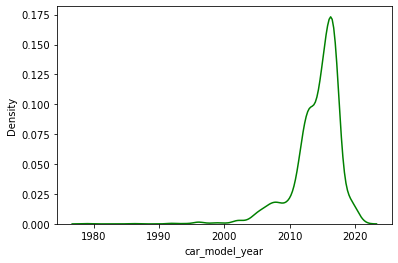

In [377]:
sns.kdeplot(dfcar1['car_model_year'],color='g');

In [378]:
#assume that the clint want to buy new model car and its low driven ,low price 
df2=dfcar1.groupby(["car_driven", "car_price", "car_model", "car_model_year"]).car_model_year.count().sort_values(ascending = False)

In [379]:
df2

car_driven  car_price  car_model  car_model_year
28000.0     37800.0    Focus      2016              16
21667.0     93450.0    MKS        2014              15
68317.0     99999.0    MKT        2015              15
29900.0     56000.0    Taurus     2015              14
1682.0      134999.0   Edge       2017              13
                                                    ..
105000.0    45000.0    Sportage   2015               1
106000.0    37000.0    6          2016               1
            44000.0    Sonata     2018               1
            53000.0    6          2016               1
4005235.0   6000.0     Accord     2002               1
Name: car_model_year, Length: 1093, dtype: int64

Create a box plot for each of the numerical features in our dataset(only on car model year).

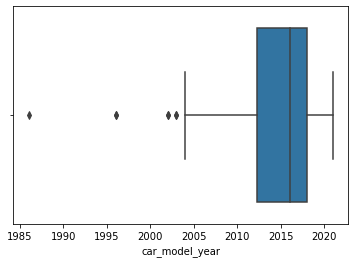

In [149]:
sns.boxplot(newdf.car_model_year);

/Users/bushrausif/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


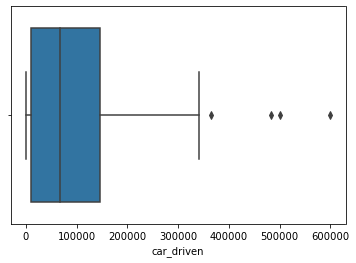

In [152]:
sns.boxplot(newdf.car_driven);

/Users/bushrausif/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


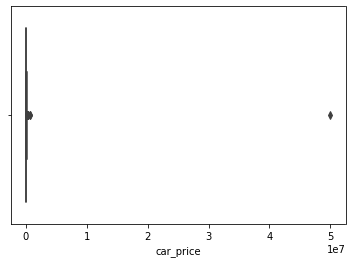

In [150]:
sns.boxplot(newdf.car_price);

In [ ]:
dfcar.sort_values(by=['car_transmission'])
dfcar.boxplot(x="car_price", y="car_driven", kind="bar",figsize=(12, 6))
plt.xticks(fontsize=12,rotation=90)
plt.tight_layout()
plt.title('Outliers for car_driven')
plt.xlabel('Car model')
plt.ylabel('Car driven')
plt.show()

Use the pandas boxplot and separate the data by the "car_brand" column.

In [ ]:
#mask on new dataframe to get 

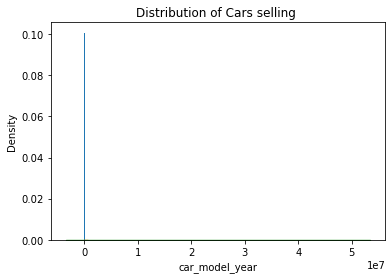

In [198]:
sns.kdeplot(newdf['car_model_year'], label='Car Model Year', shade=True)
sns.kdeplot(newdf['car_driven'], label='Car Driven', shade=True)
sns.kdeplot(newdf['car_price'], label="Car Prices", shade=True)
plt.title("Distribution of Cars selling ");

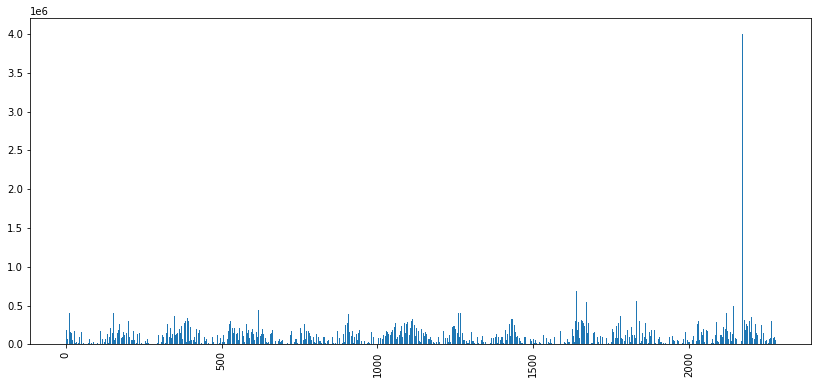

In [69]:
plt.figure(figsize=[14,6])
plt.bar(aa.index,aa.car_driven)
plt.xticks(rotation=90);

<AxesSubplot:xlabel='car_brand', ylabel='count'>

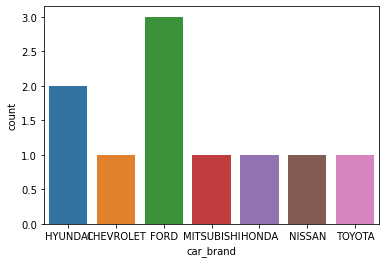

In [436]:
sns.countplot(x=dfcar1.car_brand.head(10))

<AxesSubplot:xlabel='car_price', ylabel='count'>

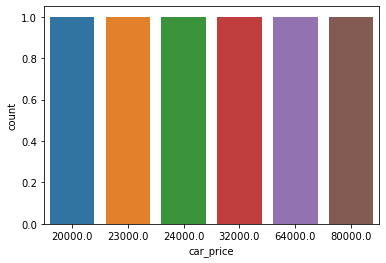

In [89]:
sns.countplot(x=dfcar1.car_price.head(6))

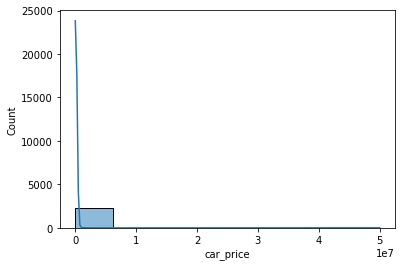

In [90]:
sns.histplot(dfcar1['car_price'],bins=8, kde=True);